In [2]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 8.9 MB/s eta 0:00:00


In [4]:
%pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 3.0 MB/s eta 0:00:00


In [5]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [10]:
# Open AI
import os
from google.colab import userdata

# Load the API key from Colab Secrets
openai_api_key = userdata.get('OPENAI_API_KEY')
model = ChatOpenAI(api_key=openai_api_key)

In [11]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str
    evaluate: str

In [12]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [13]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [18]:
# Create evaluate_blog Function
def evaluate_blog(state: BlogState) -> BlogState:

    outline = state['outline']
    content = state['content']

    prompt = f'Based on the outline - {outline}, evaluate the blog content - {content} and provide feedback on how to improve it.'

    evaluation = model.invoke(prompt).content
    state['evaluate'] = evaluation
    return state

In [19]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluate_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()


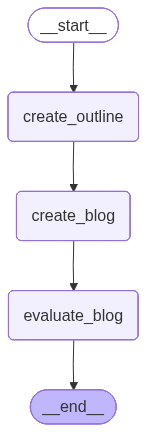

In [20]:
workflow

In [21]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': 'I. Introduction\n   A. Brief overview of the rise of Artificial Intelligence (AI) globally\n   B. Introduction to the current state of AI in India\n   C. Statement of purpose for the blog\n   \nII. Historical Perspective\n   A. Timeline of AI advancements in India\n   B. Key milestones in the development of AI technology in India\n   C. Impact of international collaborations on the growth of AI in India\n\nIII. Current State of AI in India\n   A. Overview of the AI market in India\n   B. Key players in the Indian AI industry\n   C. Government initiatives and policies supporting AI development in India\n\nIV. Applications of AI in India\n   A. AI in healthcare\n   B. AI in agriculture\n   C. AI in finance\n   D. AI in manufacturing\n   E. AI in education\n\nV. Challenges and Opportunities\n   A. Challenges facing the adoption of AI in India\n   B. Opportunities for growth and innovation in the Indian AI industry\n   C. Ethical considerations 

In [22]:
print(final_state['outline'])

I. Introduction
   A. Brief overview of the rise of Artificial Intelligence (AI) globally
   B. Introduction to the current state of AI in India
   C. Statement of purpose for the blog
   
II. Historical Perspective
   A. Timeline of AI advancements in India
   B. Key milestones in the development of AI technology in India
   C. Impact of international collaborations on the growth of AI in India

III. Current State of AI in India
   A. Overview of the AI market in India
   B. Key players in the Indian AI industry
   C. Government initiatives and policies supporting AI development in India

IV. Applications of AI in India
   A. AI in healthcare
   B. AI in agriculture
   C. AI in finance
   D. AI in manufacturing
   E. AI in education

V. Challenges and Opportunities
   A. Challenges facing the adoption of AI in India
   B. Opportunities for growth and innovation in the Indian AI industry
   C. Ethical considerations in the development and deployment of AI technology in India

VI. Futur

In [23]:
print(final_state['content'])

I. Introduction

Artificial Intelligence (AI) has been a buzzword in the tech industry for quite some time now. The rise of AI globally has paved the way for numerous innovations and advancements in various sectors. In India, the adoption of AI has been steadily increasing, with both private and public sectors investing heavily in AI technology. The purpose of this blog is to explore the current state of AI in India, its historical perspective, applications, challenges, opportunities, and future prospects.

II. Historical Perspective

India has a rich history of AI research and development, dating back to the 1980s. Some key milestones in the development of AI technology in India include the establishment of the Center for Artificial Intelligence and Robotics (CAIR) in Bangalore in 1986 and the formation of the Indian National AI Task Force in 1988. International collaborations with leading AI research institutions and universities have also played a significant role in the growth of A